In [4]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter("ignore")

train = pd.read_csv('/Users/gaozhiping/Desktop/Kaggle/Minist/train.csv')
test = pd.read_csv('/Users/gaozhiping/Desktop/Kaggle/Minist/test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [6]:
# check missing values
train.isnull().any().describe()
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [6]:
# Split the x and y
X = train.iloc[:,1:]
y = train.iloc[:,0]

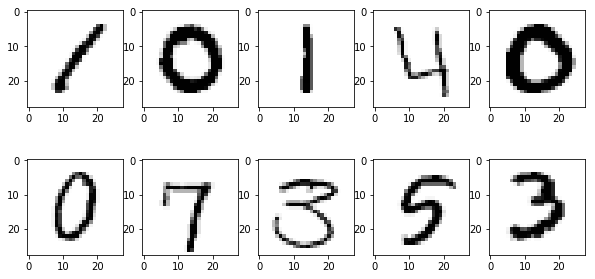

In [7]:
# check the training set
plt.figure(figsize = (10,5))

for num in range(0,10):
    plt.subplot(2,5,num+1)
    # reshape vector to matrix
    grid_data = X.iloc[num].as_matrix().reshape(28,28)
    # display the pictures
    plt.imshow(grid_data, interpolation = "none", cmap = "Greys")

In [8]:
# feature engineering
# Scaling
X = MinMaxScaler().fit_transform(X)
test = MinMaxScaler().fit_transform(test)

# split data into train_set and test_set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 14)

In [11]:
# using PCA for demention reduction
all_scores = []
# generate n_components list
n_components = np.linspace(0.7,0.9,num=20, endpoint=False)

def get_accuracy_score(n, X_train, X_test, y_train, y_test):
    '''train models with different n components, evaluated with accuracy'''      
    t0 = time()
    pca = PCA(n_components = n)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    # choose SVM
    clf = svm.SVC()
    clf.fit(X_train_pca, y_train)
    # Calculate the accuracy
    accuracy = clf.score(X_test_pca, y_test)
    t1 = time()
    print('n_components:{:.2f} , accuracy:{:.4f} , time elaps:{:.2f}s'.format(n, accuracy, t1-t0))
    return accuracy 

for n in n_components:
    score = get_accuracy_score(n,X_train, X_test, y_train, y_test)
    all_scores.append(score)  


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


n_components:0.70 , accuracy:0.9750 , time elaps:16.84s


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


n_components:0.71 , accuracy:0.9757 , time elaps:18.47s


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


n_components:0.72 , accuracy:0.9769 , time elaps:17.42s


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


n_components:0.73 , accuracy:0.9760 , time elaps:19.13s


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


n_components:0.74 , accuracy:0.9776 , time elaps:16.75s


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


n_components:0.75 , accuracy:0.9781 , time elaps:18.05s


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


n_components:0.76 , accuracy:0.9781 , time elaps:19.09s


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


n_components:0.77 , accuracy:0.9781 , time elaps:19.22s


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


n_components:0.78 , accuracy:0.9783 , time elaps:23.34s


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


n_components:0.79 , accuracy:0.9776 , time elaps:21.94s


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


n_components:0.80 , accuracy:0.9779 , time elaps:21.75s


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


n_components:0.81 , accuracy:0.9771 , time elaps:21.85s


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


n_components:0.82 , accuracy:0.9774 , time elaps:21.70s


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


n_components:0.83 , accuracy:0.9769 , time elaps:22.03s


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


n_components:0.84 , accuracy:0.9755 , time elaps:23.74s


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


n_components:0.85 , accuracy:0.9748 , time elaps:26.46s


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


n_components:0.86 , accuracy:0.9748 , time elaps:27.28s


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


n_components:0.87 , accuracy:0.9729 , time elaps:29.44s


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


n_components:0.88 , accuracy:0.9721 , time elaps:33.63s


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


n_components:0.89 , accuracy:0.9717 , time elaps:35.40s


In [9]:
# plot a line graph describing the relationship between n_components and accuracies 
# when n_components is close to 0.78, got the highest accuracy
plt.plot(n_components, all_scores, '-o')
plt.xlabel('n_components')
plt.ylabel('accuracy')
plt.show()

NameError: name 'n_components' is not defined

In [10]:
# extract false predicted data
pca = PCA(n_components = 0.78)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = svm.SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

errors = (y_pred != y_test)
y_pred_errors = y_pred[errors]
y_test_errors = y_test[errors].values
X_test_errors = X_test[errors]

In [11]:
print(y_pred_errors[:5])
print(y_test_errors[:5])
print(X_test_errors[:5])

[5 0 8 6 9]
[8 9 6 8 7]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


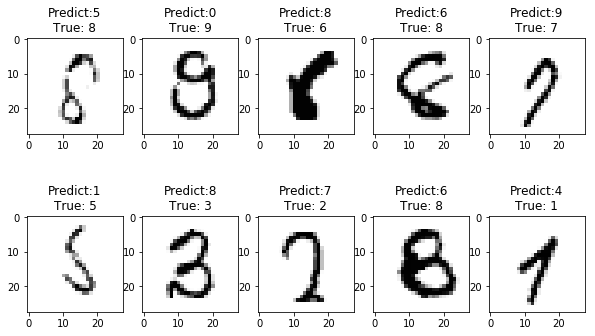

In [ ]:
# visualized the false predicted data
n = 0
nrows = 2
ncols = 5

fig, ax = plt.subplots(nrows,ncols,figsize=(10,6))

for row in range(nrows):
    for col in range(ncols):
        ax[row,col].imshow((X_test_errors[n]).reshape((28,28)), cmap = "Greys")
        ax[row,col].set_title("Predict:{}\nTrue: {}".format(y_pred_errors[n],y_test_errors[n]))
        n += 1

In [7]:
# since when n_components equals to 0.78, model accuracy is the best
# apply PCA to both train set and test set
pca = PCA(n_components=0.78)
pca.fit(X)
# print n_components
print(pca.n_components_)
# transform data with PCA
X = pca.transform(X)
test = pca.transform(test)

39


In [8]:
# train the model with SVM
# Using parameter grid for parameter tunning

clf_svc = GridSearchCV(estimator=svm.SVC(), param_grid={ 'C': [1, 2, 4, 5], 'kernel': [ 'linear', 'rbf', 'sigmoid' ] }, cv=5, verbose=2 ) 
# train the model
clf_svc.fit(X, y)
# print the parameters of the best performed model
print(clf_svc.best_params_)

# make prediction
preds = clf_svc.predict(test)
image_id = pd.Series(range(1,len(preds)+1))
result_2 = pd.DataFrame({'ImageID': image_id,'Label':preds})
# save as CSV
#result_2.to_csv('result_svc.csv',index = False)
print('Done')


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=1, kernel=linear, total=  20.9s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.2s remaining:    0.0s


[CV] ............................... C=1, kernel=linear, total=  18.3s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  18.3s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  17.3s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  17.0s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=  15.9s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=  14.3s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=  14.0s
[CV] C=1, kernel=rbf .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 35.8min finished


{'C': 5, 'kernel': 'rbf'}
Done


In [ ]:
from xgboost import XGBClassifier
alg = XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
                        min_child_weight=3, gamma=0.2, subsample=0.6, colsample_bytree=1.0,
                        objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
alg.fit(X_train, y_train, eval_metric='auc')

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

n_estimators = [50,60,70,80,90,100,130]
accuracies = []
for i in n_estimators:
    forest_model = RandomForestClassifier(random_state=1, n_estimators=i)
    forest_model.fit(X_train, y_train)
    predictions = forest_model.predict(X_test)
    accuracies.append(metrics.accuracy_score(y_test, predictions))

In [ ]:
plt.plot(n_estimators, accuracies, '-o')
plt.xlabel('n_estimators')
plt.ylabel('accuracies')
plt.show()

In [ ]:
predictions = forest_model.predict(X_test)
pred_proba = forest_model.predict_proba(X_test)[:, 1]
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, predictions))
#print("AUC (Test_set)): %f" % metrics.roc_auc_score(y_test, pred_proba))
#print("F1 Score (test_set): %f" % metrics.f1_score(y_test, predictions))

In [ ]:
clf = GridSearchCV(estimator = RandomForestClassifier(),param_grid= {"criterion" : ["gini","entropy"], "min_samples_leaf" : [1,2,3],
                                                             "n_estimators" : [10,50,100]})
clf.fit(X,y)

In [ ]:
predictions = clf.predict(X_test)
pred_proba = clf.predict_proba(X_test)[:, 1]
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, predictions))